 #  <center>Addressing the Opioid Epidemic: A National Public Health Challenge

### Domain: 
Government / Health

### Abstract:
In the United States, drug overdoses have emerged as the primary cause of unintentional fatalities, accounting for 52,404 lethal incidents in 2015. Opioid addiction serves as the driving force behind this epidemic, contributing to 20,101 overdose deaths linked to prescription pain relievers and 12,990 overdose deaths associated with heroin in the same year (CDC, ASAM). The effective distribution and administration of Narcan (naloxone HCl) plays a pivotal role in reducing mortality rates resulting from opioid overdoses.<br>
The term "War on Drugs" describes a government-led effort initiated in the 1970s to combat illegal drug usage, distribution, and trade by intensifying penalties for those involved. This initiative has continued to evolve over the years and has resulted in an opioid crisis in several US states. Presently, there is a contentious debate about whether this opioid crisis is primarily a result of Mexican and Central American migration or stems from the deregulation of pharmaceutical companies and shortcomings in the private healthcare system. At this moment, San Francisco is confronting a significant drug issue and opioid crisis.


### Research question: 
•	Analyzing various crime categories across diverse neighborhoods: What are the top 5 neighborhoods with the highest rates of assaults? Are there specific combinations of crimes that commonly occur together in particular areas?<br>
•	Identifying potential locations for implementing Safe Injection Sites (SIS) on behalf of the San Francisco government.<br>
•	Do specific demographic groups or geographical areas experience a higher incidence of fatal opioid overdoses? <br>
•	If such disparities exist, is there a discernible connection between prescription practices and opioid-related deaths within these demographics or regions?


### Target Variables:
Category


### Introduction:
Natural derivatives of Opium like heroin are called Opiates which are illegal. Similar synthetically synthesized drugs have been put under the class of Opioids which are legally available. Opioids are prescribed primarily as pain relievers despite a high risk of addiction and overdose. The increase in deaths caused by the risks involved with the consumption of opioids was alarming and declared an epidemic.<br>
San Francisco (SF) has a rich history of pioneering progressive public health solutions, such as medical cannabis and needle exchange programs, even before they were legally accepted or widely adopted. This commitment to innovation is exemplified by California passing a bill that permits SF to establish 
Safe Injection Sites (SIS).<br>
Safe Injection Sites (SIS): Safe Injection Sites are supervised medical facilities designed to offer a clean and supportive environment where individuals can safely consume intravenous recreational drugs, thus reducing public drug use-related disturbances. These sites are part of a harm reduction strategy in addressing drug-related issues. The first SIS in North America was established in the Downtown Eastside (DTES) neighborhood of Vancouver in 2003.


### Dataset:
•	https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry/data <br>
•	https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/data


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# d_crime = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
d_crime = pd.read_csv(r"Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

In [5]:
d_crime.head(5)

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


In [6]:
d_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129525 entries, 0 to 2129524
Data columns (total 35 columns):
 #   Column                                                    Dtype  
---  ------                                                    -----  
 0   PdId                                                      int64  
 1   IncidntNum                                                int64  
 2   Incident Code                                             int64  
 3   Category                                                  object 
 4   Descript                                                  object 
 5   DayOfWeek                                                 object 
 6   Date                                                      object 
 7   Time                                                      object 
 8   PdDistrict                                                object 
 9   Resolution                                                object 
 10  Address                       

In [7]:
print(d_crime.shape)
d_crime.head(1)

(2129525, 35)


,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
date=pd.to_datetime(d_crime['Date'])
print(date.min())
print(date.max())
# t_delta=(date-date.min()).astype('timedelta64[D]')
# d_crime['days']=t_delta


# Calculate timedelta in days
t_delta_days = (date - date.min()) / pd.Timedelta(days=1)

d_crime['days'] = t_delta_days.astype(int)
d_crime.head(1)


2003-01-01 00:00:00
2018-05-15 00:00:00


,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,days
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,691


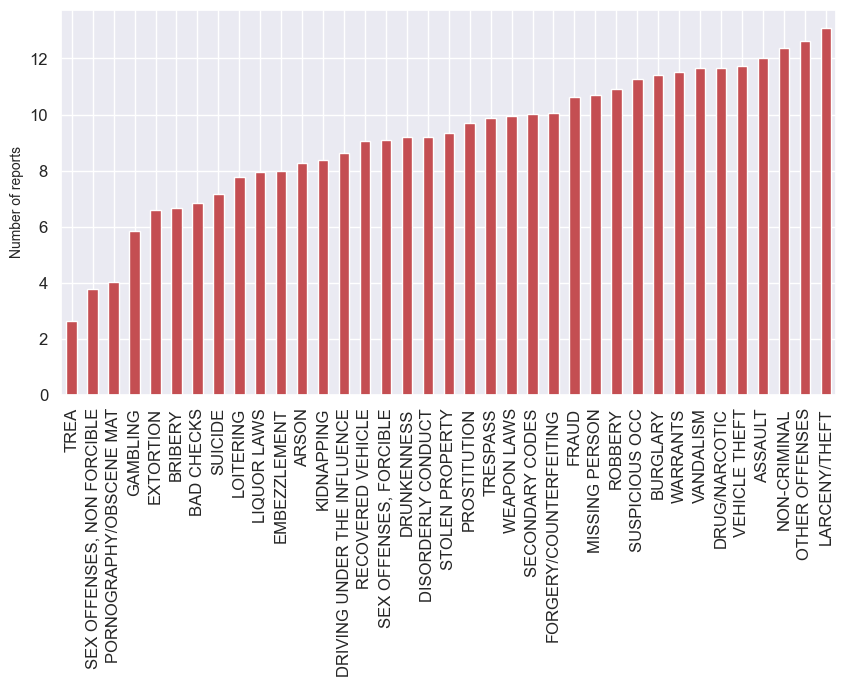

In [9]:
def plotdata(data,cat):
    l=data.groupby(cat).size()
    l=np.log(l)
    l=l.sort_values()
    fig=plt.figure(figsize=(10,5))
    plt.yticks(fontsize=8)
    l.plot(kind='bar',fontsize=12,color='r')
    plt.xlabel('')
    plt.ylabel('Number of reports',fontsize=10)

plotdata(d_crime,'Category')

In [10]:
l=d_crime.groupby('Descript').size()
l=l.sort_values()
print(l.shape)

(847,)


Since there's 915 different crime types, let's slice by percentile and filter the crimes below 97th percentile. Let's have a look at the top types of crime for each PdDistrict.

In [11]:
def types_districts(d_crime,per):
    
    # Group by crime type and district 
    hoods_per_type=d_crime.groupby('Descript').PdDistrict.value_counts(sort=True)
    t=hoods_per_type.unstack().fillna(0)
    
    # Sort by hood sum
    hood_sum=t.sum(axis=0)
    hood_sum=hood_sum.sort_values(ascending=False)
    t=t[hood_sum.index]
    
    # Filter by crime per district
    crime_sum=t.sum(axis=1)
    crime_sum=crime_sum.sort_values()
    
    # Large number, so let's slice the data.
    p=np.percentile(crime_sum,per)
    ix=crime_sum[crime_sum>p]
    t=t.loc[ix.index]
    return t
    
t=types_districts(d_crime,97)

Cluster the non-normalized data across the top percentile reports and each PdDistrict.

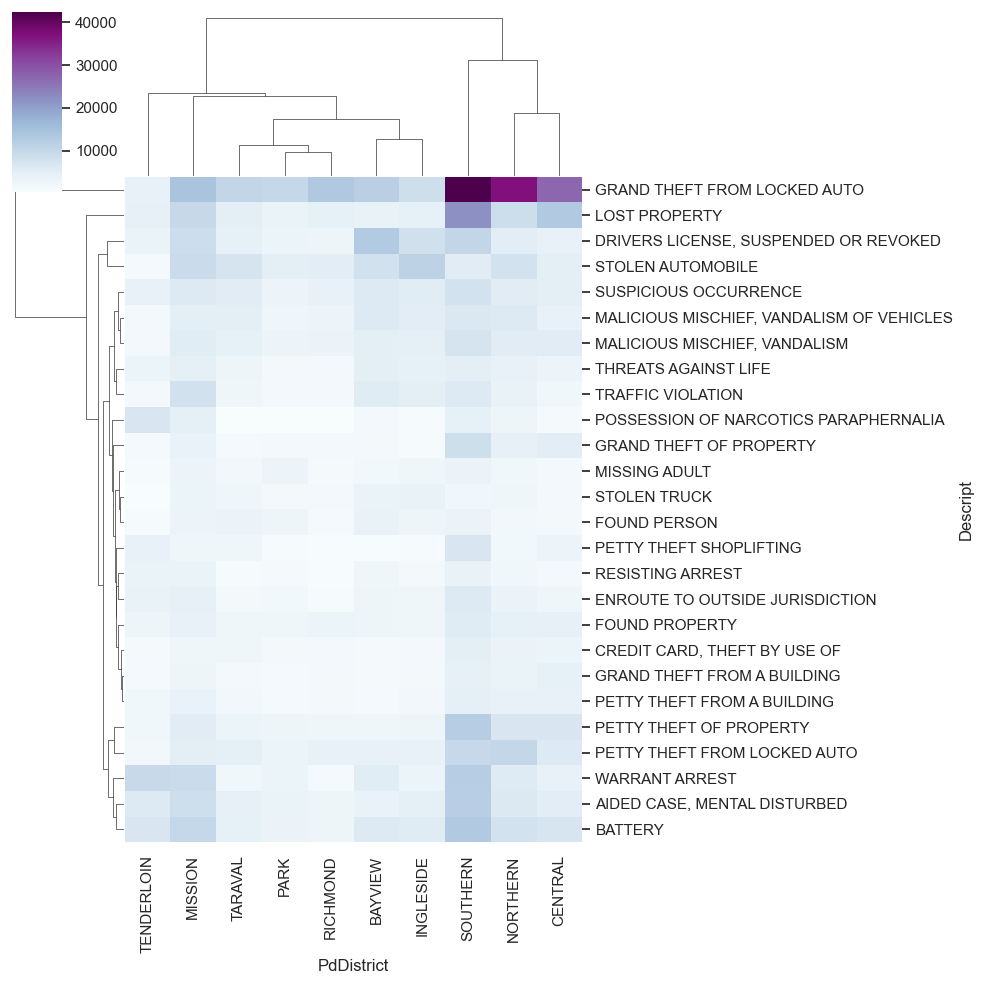

In [12]:
sns.clustermap(t,cmap="BuPu")

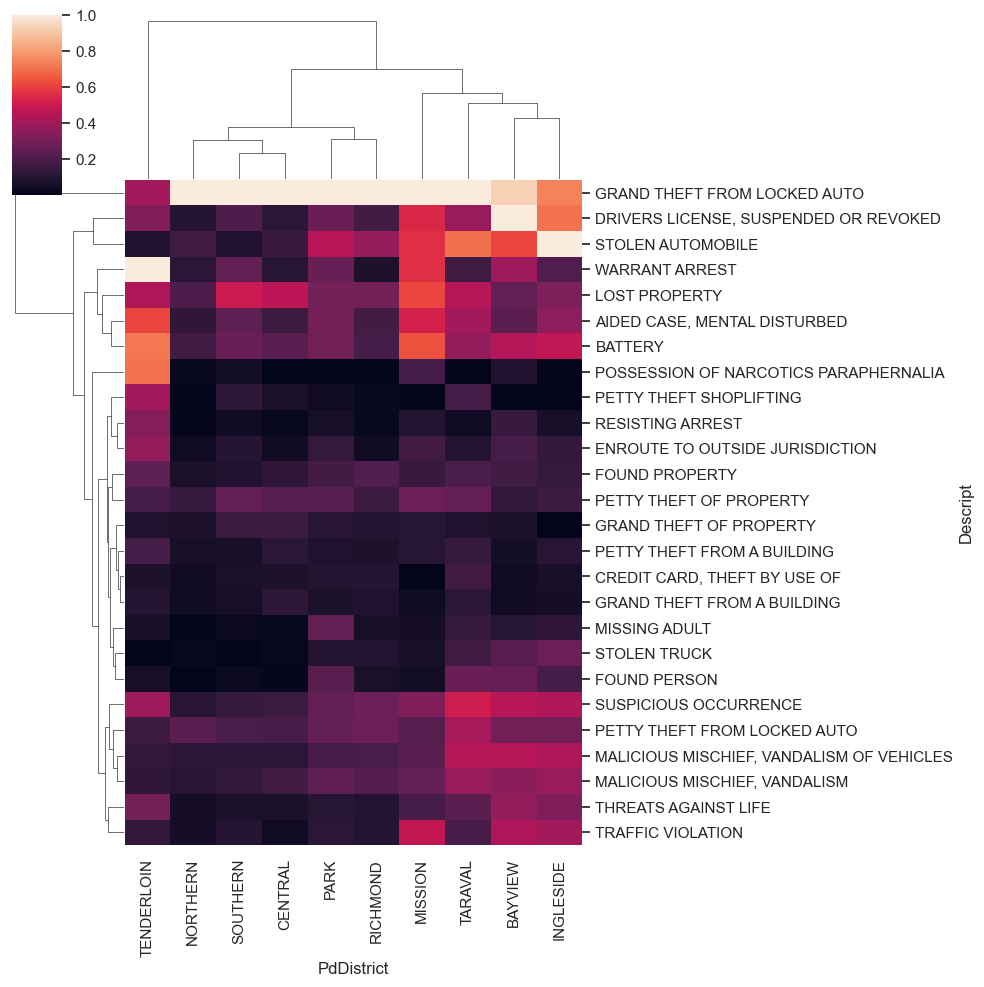

In [13]:
#Normalize vertically across PdDistrict.
sns.clustermap(t,standard_scale=1,  vmin=0.0002, vmax=1)

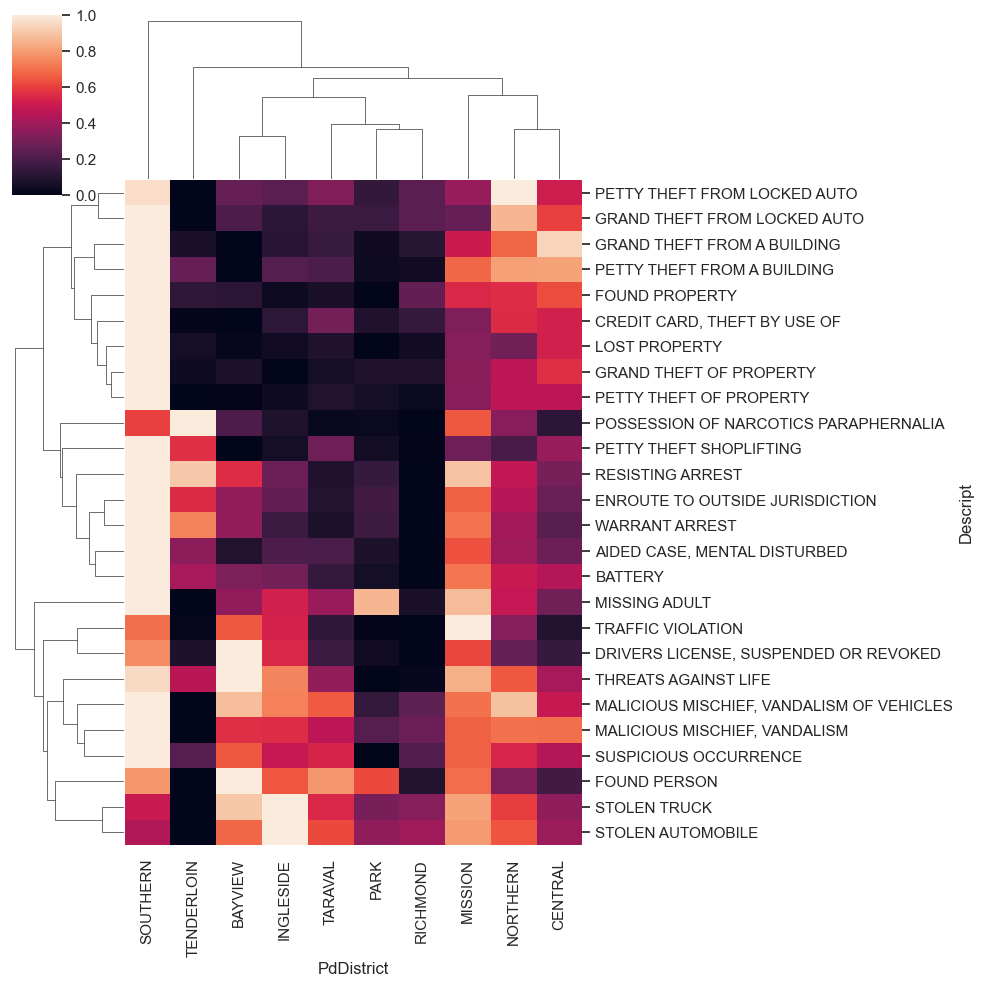

In [14]:
#Normalize horizontally across crime types.
sns.clustermap(t,standard_scale=0) 



1.   GTA is the most common crime in most PdDistricts.

  *   Tenderloin is an outlier, enriched in base/rock crack and narcotics.


2.   For the distribution of crime across areas:
  
  *   Southern: Theft, including theft from auto.
  *   Tenderloin: Base / rock crack and narcotics.
  *   Bayview: Violence and threats.

**Now, let's drill down on a specific question -** Lets, re-examine the crime types.






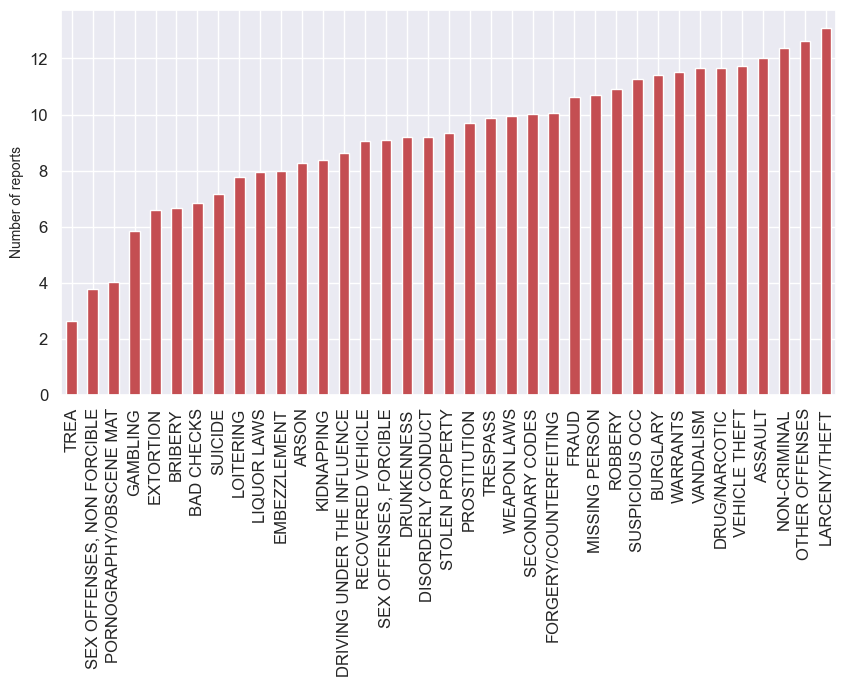

In [15]:
plotdata(d_crime,'Category')

We're interested in DRUG/NARCOTIC:


1.    it will show some interesting dynamics.
2.   different areas of the city will have different distributions.





In [16]:
# Let's drill down onto one
cat=d_crime[d_crime['Category']=='DRUG/NARCOTIC']
c=cat['Descript'].value_counts()
c.sort_values(ascending=False)
c.head(10)

Descript
POSSESSION OF NARCOTICS PARAPHERNALIA       22785
POSSESSION OF BASE/ROCK COCAINE             14228
POSSESSION OF MARIJUANA                     11287
SALE OF BASE/ROCK COCAINE                    8967
POSSESSION OF METH-AMPHETAMINE               8715
POSSESSION OF BASE/ROCK COCAINE FOR SALE     7823
POSSESSION OF MARIJUANA FOR SALES            5806
POSSESSION OF HEROIN                         4537
POSSESSION OF CONTROLLED SUBSTANCE           4449
POSSESSION OF COCAINE                        3168
Name: count, dtype: int64

In [17]:
#We can use what we had above, but we simply slice the input data on a category first (above).
t=types_districts(cat,70)

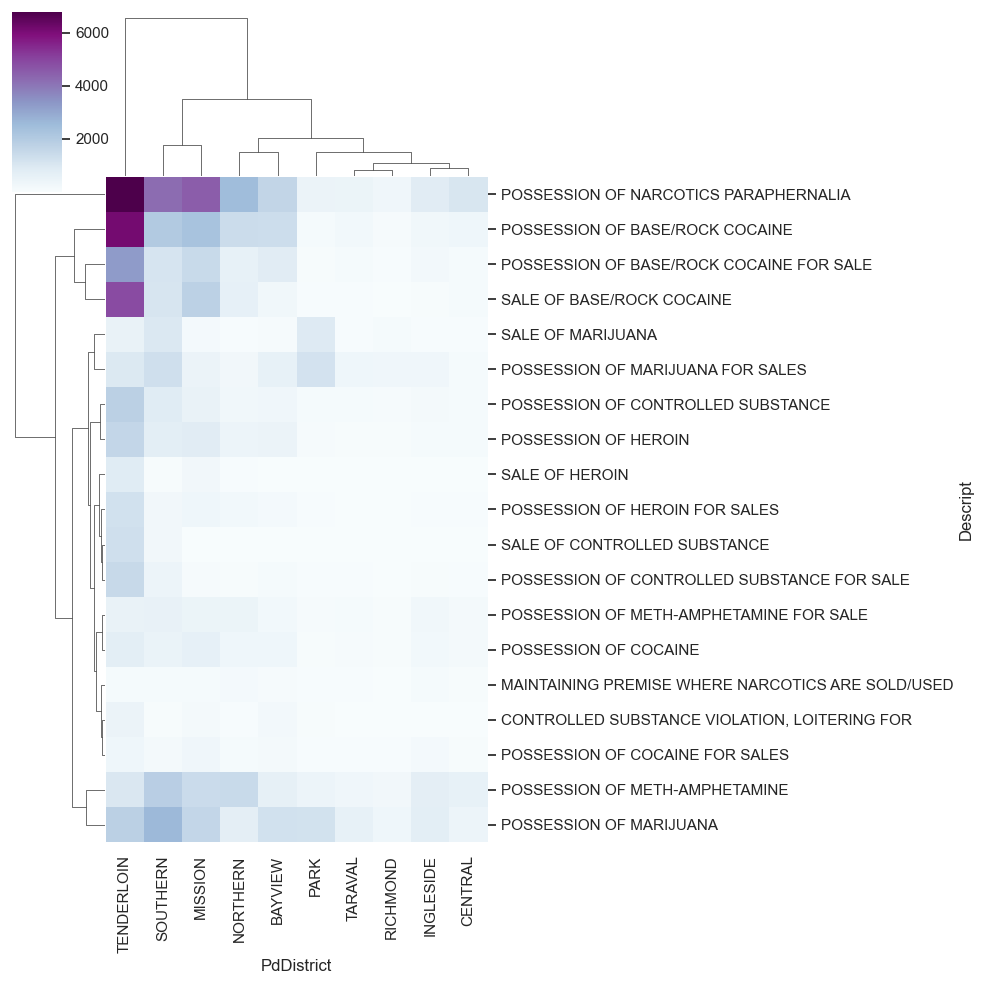

In [18]:
sns.clustermap(t,cmap='BuPu')

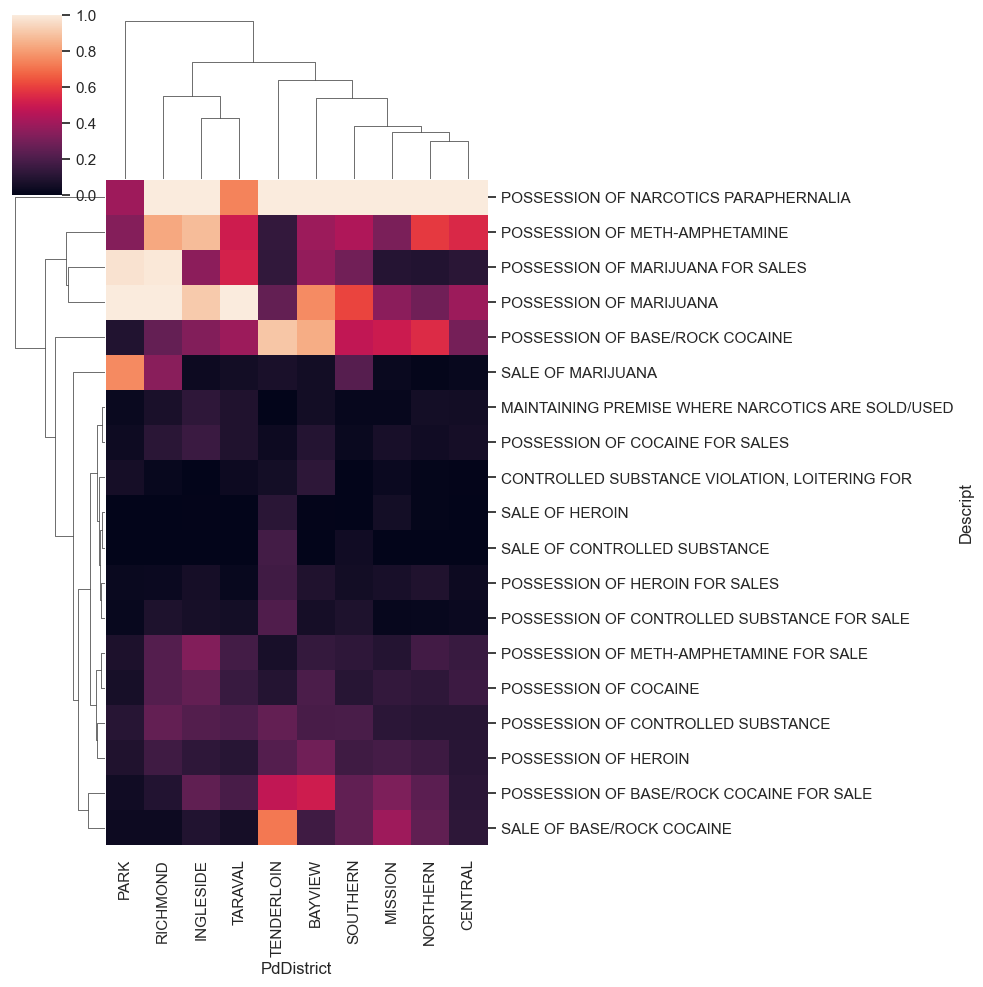

In [19]:
sns.clustermap(t,standard_scale=1)

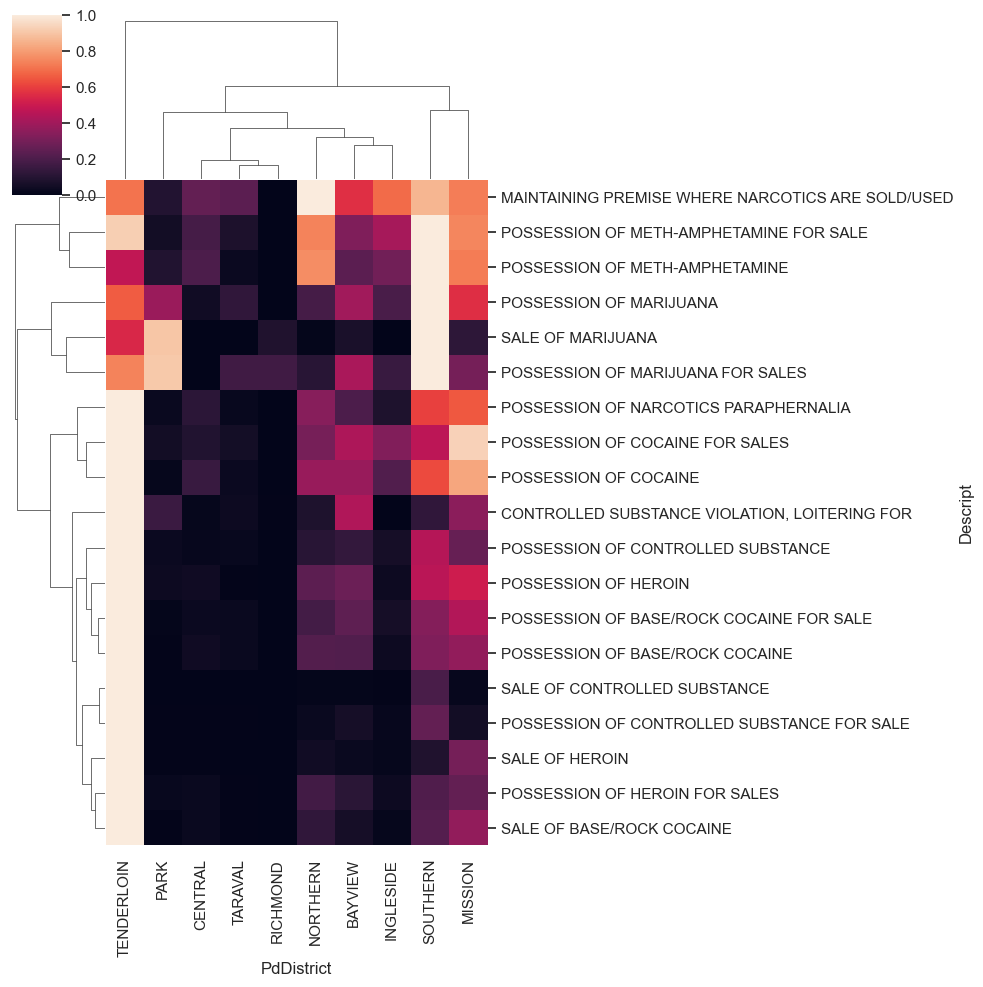

In [20]:
sns.clustermap(t,standard_scale=0)

In [21]:
# Let's drill down onto one
cat=d_crime[d_crime['Category']=='DRUG/NARCOTIC']

# Bin crime by 30 day window
cat['Month']=np.floor(cat['days']/30) # Approximate month (30 day window)

# Default
district='All'

In [22]:
def timeseries(dat,per):
    ''' Category grouped by month '''
    
    # Group by crime type and district 
    cat_per_time=dat.groupby('Month').Descript.value_counts(sort=True)
    t=cat_per_time.unstack().fillna(0)
        
    # Filter by crime per district
    crime_sum=t.sum(axis=0)
    crime_sum.sort_values()
    
    # Large number, so let's slice the data.
    p=np.percentile(crime_sum,per)
    ix=crime_sum[crime_sum>p]
    t=t[ix.index]
    return t
    
t_all=timeseries(cat,0)

In [23]:
barituate_features=['SALE OF BARBITUATES',
                    'POSSESSION OF BARBITUATES FOR SALES',
                    'ENCOURAGE MINOR TO USE BARBITUATES',
                    'POSSESSION OF BARBITUATES']

In [24]:
coke_features=['ENCOURAGING MINOR TO USE COCAINE',
               'SALES COCAINE BASE/SCHOOLYARD TRAFFICKING ACT VIO',
               'TRANSPORTATION OF COCAINE',
               'SALE OF COCAINE',
               'POSSESSION OF COCAINE FOR SALES',
               'POSSESSION OF COCAINE']

In [25]:
weed_features=['ENCOURAGING MINOR TO USE MARIJUANA',
               'FURNISHING MARIJUANA',
               'PLANTING/CULTIVATING MARIJUANA',
               'TRANSPORTATION OF MARIJUANA',
               'SALE OF MARIJUANA',
               'POSSESSION OF MARIJUANA FOR SALES',
               'POSSESSION OF MARIJUANA']

In [26]:
metadone_features=['TRANSPORTATION OF METHADONE',
                   'SALE OF METHADONE',
                   'POSSESSION OF METHADONE FOR SALES',
                   'POSSESSION OF METHADONE']

In [27]:
hallu_features=['TRANSPORTATION OF OPIATES',
                'SALE OF HALLUCINOGENIC',
                'POSSESSION OF OPIUM',
                'POSSESSION OF OPIUM DERIVATIVE',
                'POSSESSION OF OPIUM',
                'SALE OF OPIUM',
                'SALE OF OPIUM DERIVATIVE',
                'TRANSPORTATION OF OPIATES',
                'POSSESSION OF OPIUM FOR SALES',
                'TRANSPORTATION OF HALLUCINOGENIC',
                'POSSESSION OF OPIUM DERIVATIVE FOR SALES',
                'SALE OF OPIATES',
                'SALE OF HALLUCINOGENIC',
                'POSSESSION OF OPIUM DERIVATIVE',
                'POSSESSION OF OPIUM',
                'POSSESSION OF OPIATES FOR SALES',
                'POSSESSION OF HALLUCINOGENIC FOR SALES',
                'POSSESSION OF OPIATES',
                'POSSESSION OF HALLUCINOGENIC']

In [28]:
meth_features=['TRANSPORTATION OF AMPHETAMINE',
               'SALE OF AMPHETAMINE',
               'POSSESSION OF AMPHETAMINE',
               'SALE OF METH-AMPHETAMINE',
               'TRANSPORTATION OF METH-AMPHETAMINE',
               'POSSESSION OF AMPHETAMINE FOR SALES',
               'POSSESSION OF METH-AMPHETAMINE FOR SALE',
               'POSSESSION OF METH-AMPHETAMINE']
heroin_features=['SALE OF HEROIN',
                 'POSSESSION OF HEROIN',
                 'POSSESSION OF HEROIN FOR SALES',
                 'TRANSPORTATION OF HEROIN',
                 'SALE OF HEROIN',
                 'POSSESSION OF HEROIN FOR SALES',
                 'POSSESSION OF HEROIN']
crack_features=['POSSESSION OF BASE/ROCK COCAINE FOR SALE',
                'SALE OF BASE/ROCK COCAINE',
                'POSSESSION OF BASE/ROCK COCAINE']

In [29]:
# Lets use real dates for plotting
days_from_start=pd.Series(t_all.index*30).astype('timedelta64[D]')
dates_for_plot=date.min()+days_from_start
time_labels=dates_for_plot.map(lambda x: str(x.year)+'-'+str(x.month))

In [30]:
time_labels

0      2003-1
1      2003-1
2      2003-3
3      2003-4
4      2003-5
        ...  
183    2018-1
184    2018-2
185    2018-3
186    2018-4
187    2018-5
Name: Month, Length: 188, dtype: object

In [31]:
def drug_analysis(t,district,plot):
    fig=plt.figure(figsize=(15, 10))  
    t['BARBITUATES']=t[map(lambda s: s.strip(), barituate_features)].sum(axis=1)
    t['HEROIN']=t[map(lambda s: s.strip(), heroin_features)].sum(axis=1)
    t['HALLUCINOGENIC']=t[map(lambda s: s.strip(), hallu_features)].sum(axis=1)
    t['METH']=t[map(lambda s: s.strip(), meth_features)].sum(axis=1)
    t['WEED']=t[map(lambda s: s.strip(), weed_features)].sum(axis=1)
    t['COKE']=t[map(lambda s: s.strip(), coke_features)].sum(axis=1)
    t['METHADONE']=t[map(lambda s: s.strip(), metadone_features)].sum(axis=1)
    t['CRACK']=t[map(lambda s: s.strip(), crack_features)].sum(axis=1)
    drugs=t[['HEROIN','HALLUCINOGENIC','METH','WEED','COKE','CRACK']]
    if plot:
        drugs.index=[int(i) for i in drugs.index]
        colors = plt.cm.jet(np.linspace(0, 1, drugs.shape[1]))
        drugs.plot(kind='bar', stacked=True, figsize=(20,8), color=colors, width=1, title=district,fontsize=6)
    return drugs

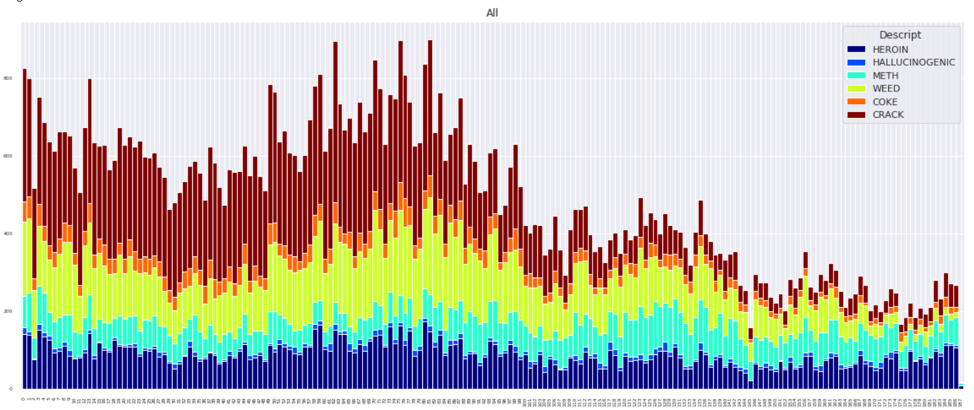

In [32]:
def drug_analysis_rescale(t,district,plot):
    t['BARBITUATES']=t[map(lambda s: s.strip(), barituate_features)].sum(axis=1)
    t['HEROIN']=t[map(lambda s: s.strip(), heroin_features)].sum(axis=1)
    t['HALLUCINOGENIC']=t[map(lambda s: s.strip(), hallu_features)].sum(axis=1)
    t['METH']=t[map(lambda s: s.strip(), meth_features)].sum(axis=1)
    t['WEED']=t[map(lambda s: s.strip(), weed_features)].sum(axis=1)
    t['COKE']=t[map(lambda s: s.strip(), coke_features)].sum(axis=1)
    t['METHADONE']=t[map(lambda s: s.strip(), metadone_features)].sum(axis=1)
    t['CRACK']=t[map(lambda s: s.strip(), crack_features)].sum(axis=1)
    drugs=t[['HEROIN','HALLUCINOGENIC','METH','WEED','COKE','CRACK']]
    if plot:
        drugs=drugs.div(drugs.sum(axis=1),axis=0)
        drugs.index=[int(i) for i in drugs.index]
        colors = plt.cm.GnBu(np.linspace(0, 1, drugs.shape[1]))
        colors = plt.cm.jet(np.linspace(0, 1, drugs.shape[1]))
        drugs.plot(kind='bar', stacked=True, figsize=(20,5), color=colors, width=1, title=district, legend=False)
        plt.ylim([0,1])
    return drugs

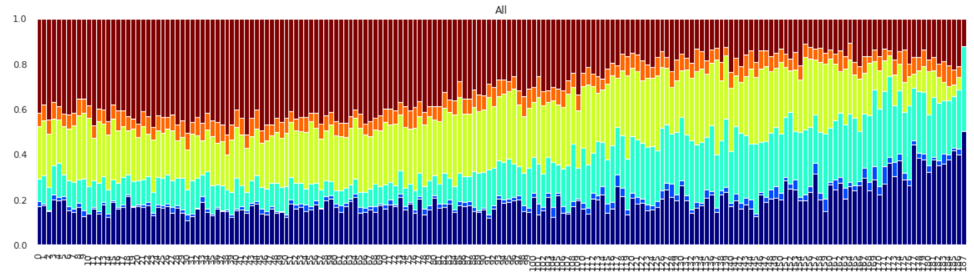

In [33]:
def real_dates():
    #let's add the real dates
    dates_for_plot.index=dates_for_plot
    fig=plt.figure(figsize=(12,8))
    for d,c in zip(['METH','CRACK','HEROIN','WEED'],['b','r','c','g']):
        plt.plot(dates_for_plot.index,drug_df_all[d],'o-',color=c,ms=6,mew=1.5,mec='white',linewidth=0.5,label=d,alpha=0.75)
    plt.legend(loc='upper left',scatterpoints=1,prop={'size':8})

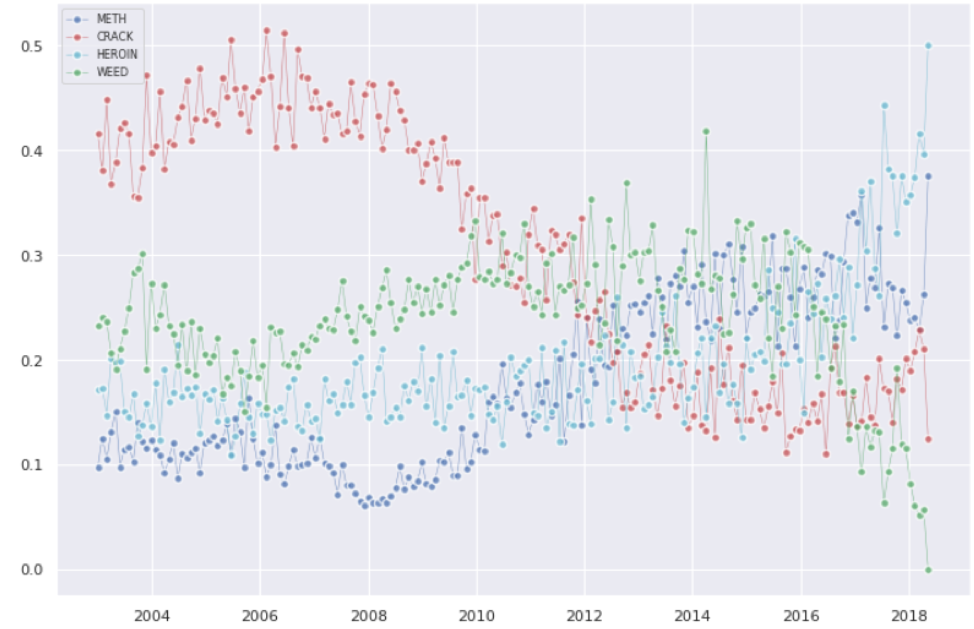

In [34]:
# Filtering data for Drugs and Narcotics incidents
drugs_narcotics_data = cat[cat['Category'] == 'DRUG/NARCOTIC']

### Countplot of incidents per year

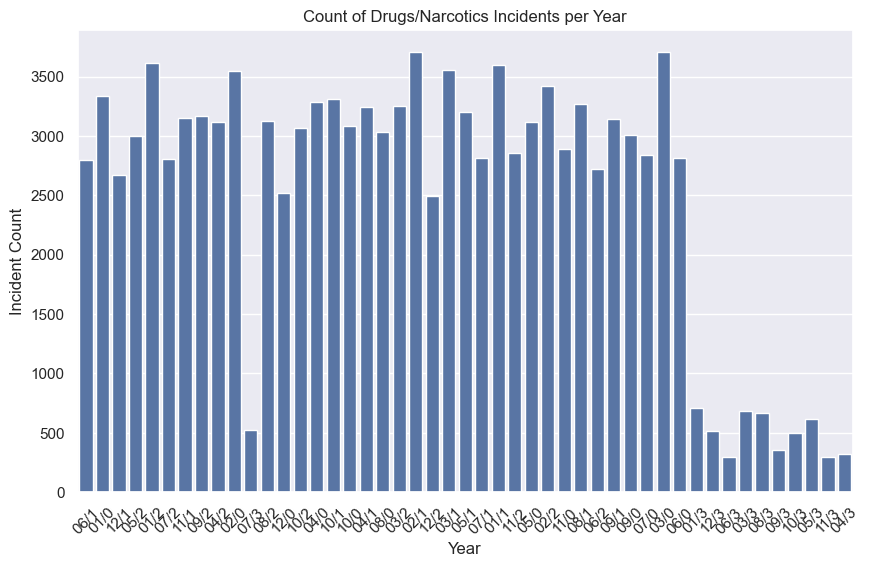

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x=drugs_narcotics_data['Date'].str.slice(0, 4))
plt.title('Count of Drugs/Narcotics Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.show()

### Monthly trends over the years

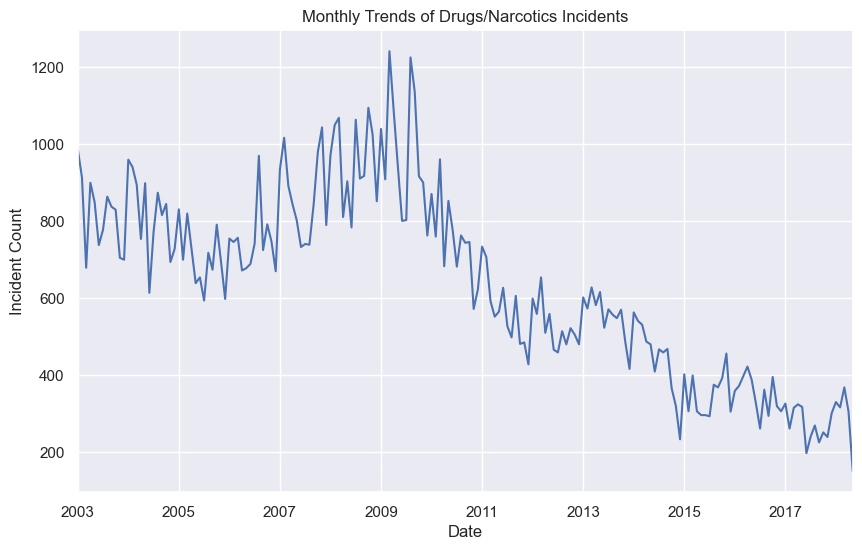

In [36]:
drugs_narcotics_data['Date'] = pd.to_datetime(drugs_narcotics_data['Date'])
drugs_narcotics_data.set_index('Date', inplace=True)
monthly_count = drugs_narcotics_data.resample('M').size()

plt.figure(figsize=(10, 6))
monthly_count.plot()
plt.title('Monthly Trends of Drugs/Narcotics Incidents')
plt.xlabel('Date')
plt.ylabel('Incident Count')
plt.show()

### Day-wise distribution of incidents

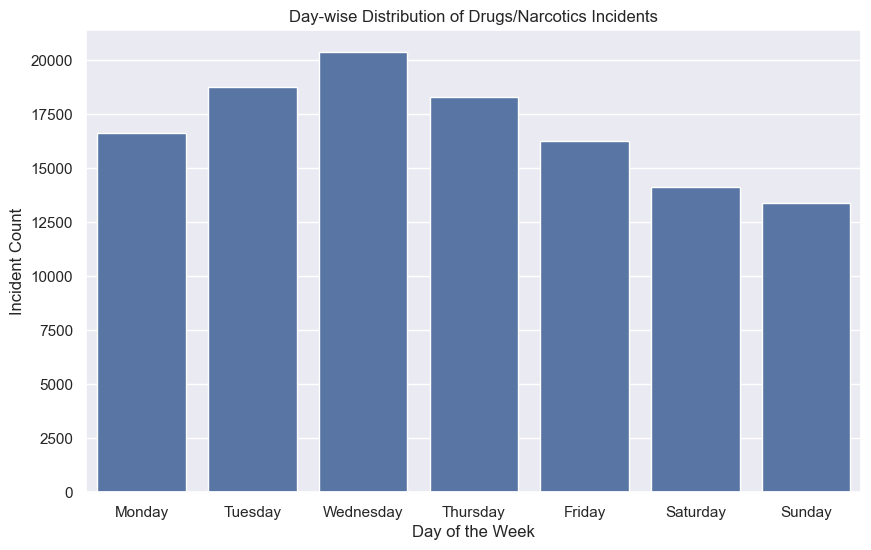

In [37]:

plt.figure(figsize=(10, 6))
drugs_narcotics_data['DayOfWeek'] = drugs_narcotics_data.index.day_name()
sns.countplot(x=drugs_narcotics_data['DayOfWeek'], order=[
              'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day-wise Distribution of Drugs/Narcotics Incidents')
plt.xlabel('Day of the Week')
plt.ylabel('Incident Count')
plt.show()

### Top 10 districts with the highest number of incidents

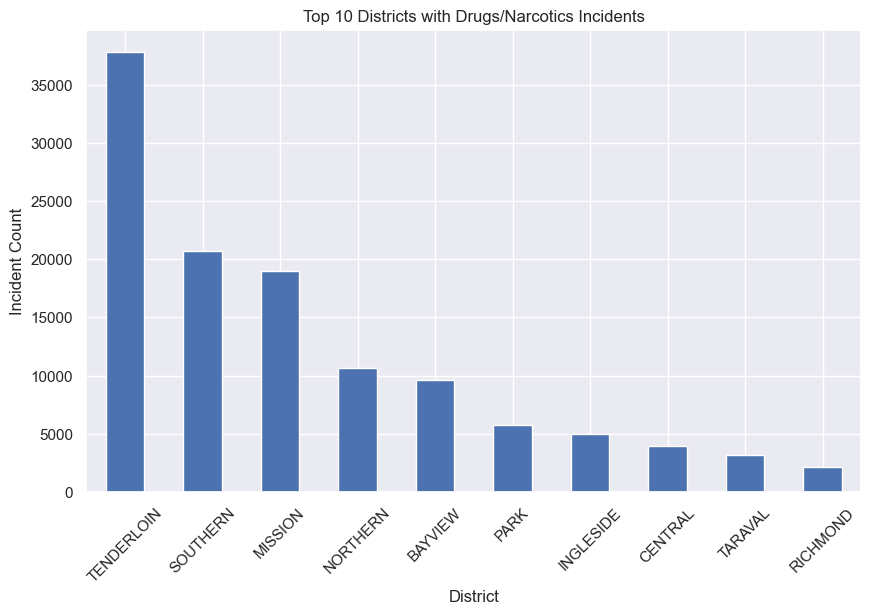

In [38]:
top_districts = drugs_narcotics_data['PdDistrict'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_districts.plot(kind='bar')
plt.title('Top 10 Districts with Drugs/Narcotics Incidents')
plt.xlabel('District')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.show()

### Incident resolution types


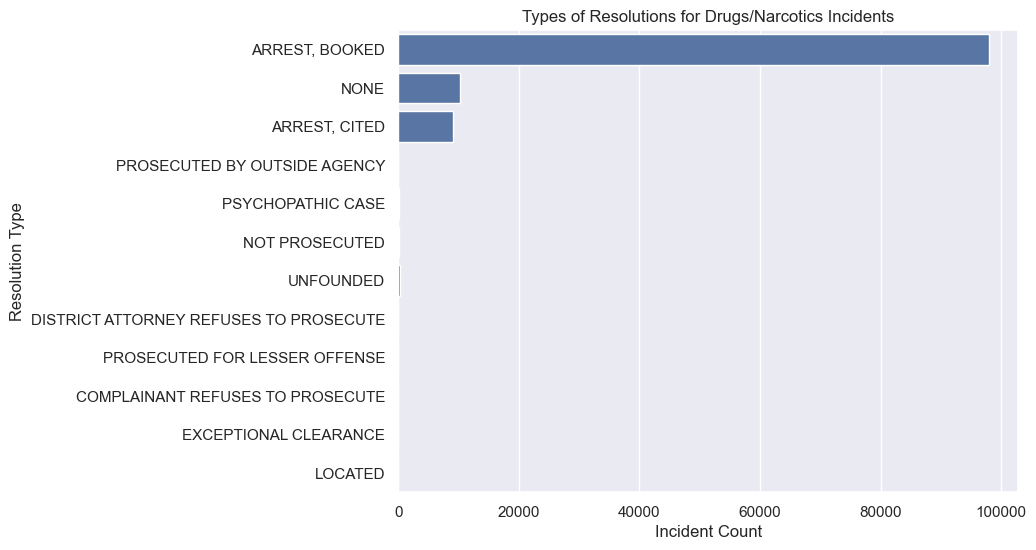

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(y=drugs_narcotics_data['Resolution'])
plt.title('Types of Resolutions for Drugs/Narcotics Incidents')
plt.xlabel('Incident Count')
plt.ylabel('Resolution Type')
plt.show()

### Heatmap showing monthly incident counts over the years

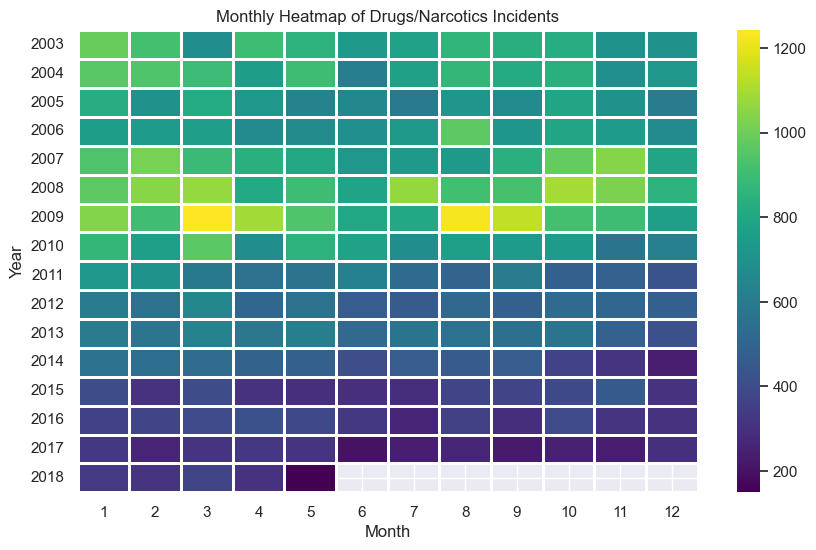

In [40]:
monthly_incidents = drugs_narcotics_data.groupby(
    [drugs_narcotics_data.index.year, drugs_narcotics_data.index.month]).size().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_incidents, cmap='viridis', linecolor='white', linewidth=1)
plt.title('Monthly Heatmap of Drugs/Narcotics Incidents')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

### Pie chart of incident categories

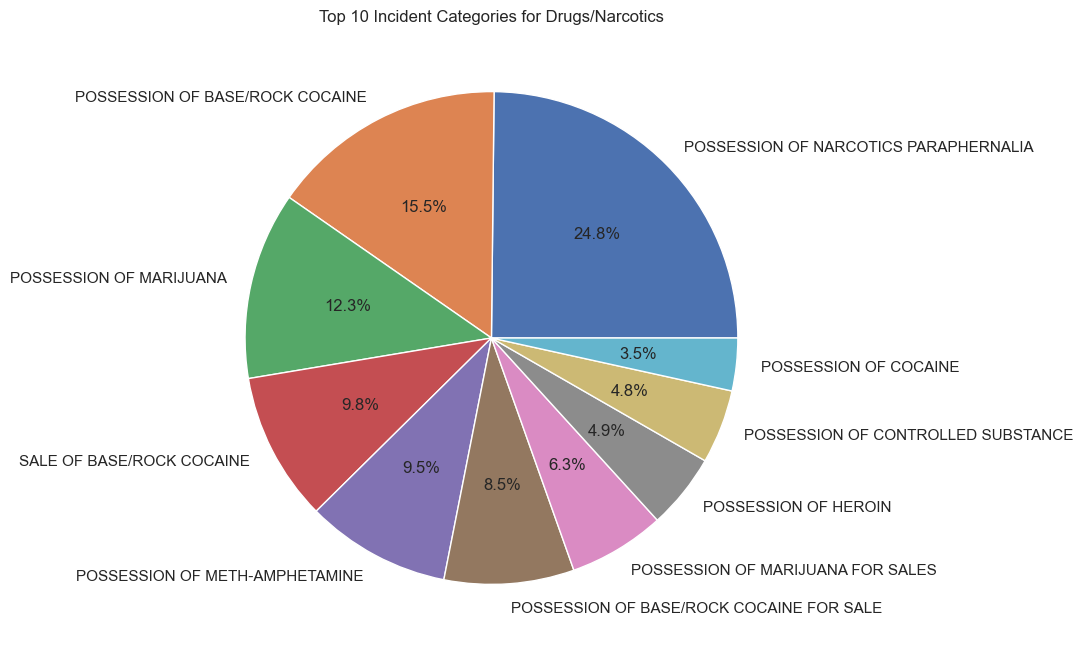

In [41]:
plt.figure(figsize=(8, 8))
drugs_narcotics_data['Descript'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Incident Categories for Drugs/Narcotics')
plt.ylabel('')
plt.show()

### Duration between reported and occurred dates

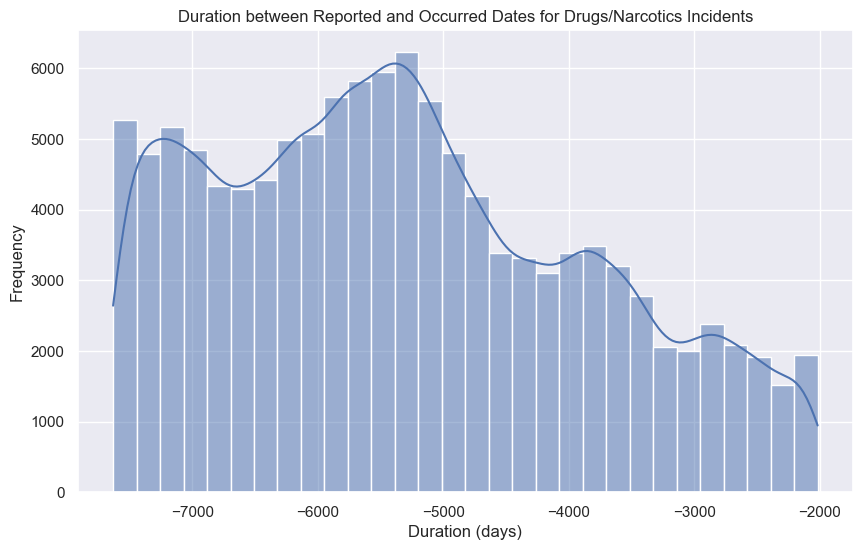

In [42]:
drugs_narcotics_data['Reported_Duration'] = pd.to_datetime(
    drugs_narcotics_data.index) - pd.to_datetime(drugs_narcotics_data['Time'])
plt.figure(figsize=(10, 6))
sns.histplot(drugs_narcotics_data['Reported_Duration'].dt.days, bins=30, kde=True)
plt.title('Duration between Reported and Occurred Dates for Drugs/Narcotics Incidents')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.show()

### Incidents by resolution and day of the week

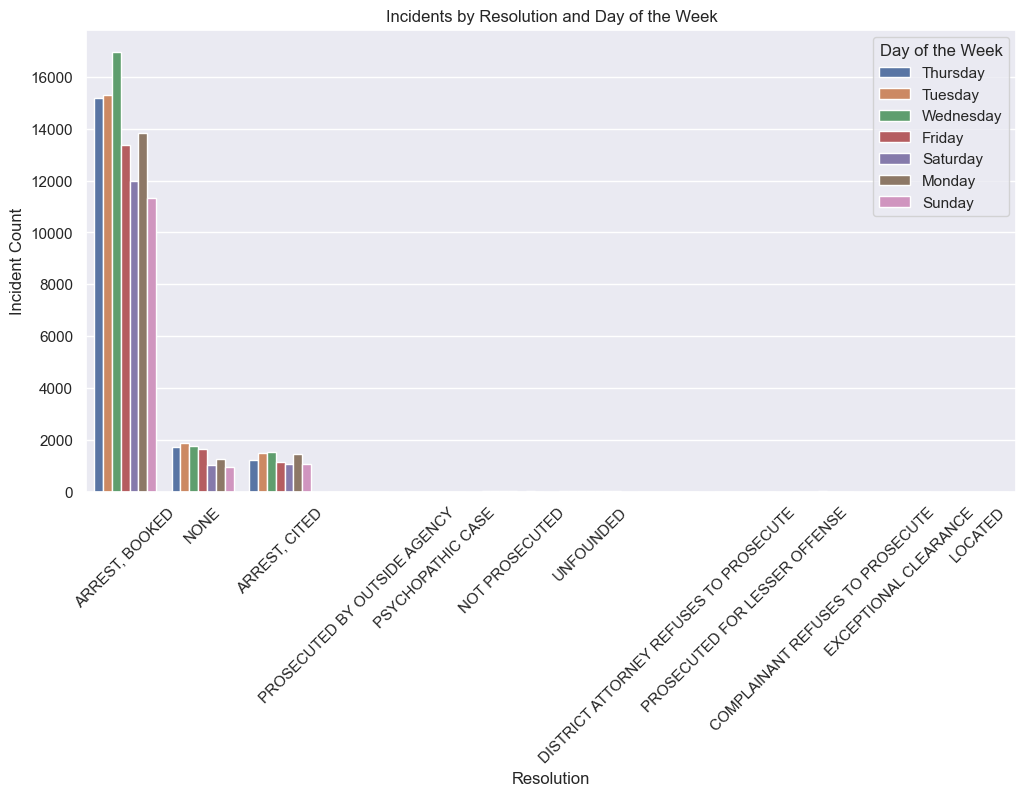

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Resolution', hue='DayOfWeek', data=drugs_narcotics_data)
plt.title('Incidents by Resolution and Day of the Week')
plt.xlabel('Resolution')
plt.ylabel('Incident Count')
plt.legend(title='Day of the Week')
plt.xticks(rotation=45)
plt.show()

# Data Preprocessing


In [44]:
# Handling missing values if any
missing_values = drugs_narcotics_data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 PdId                                                             0
IncidntNum                                                       0
Incident Code                                                    0
Category                                                         0
Descript                                                         0
DayOfWeek                                                        0
Time                                                             0
PdDistrict                                                       0
Resolution                                                       0
Address                                                          0
X                                                                0
Y                                                                0
location                                                         0
SF Find Neighborhoods 2 2                                      160
Current Police Districts 2 2                 

In [45]:
# drugs_narcotics_data123 = drugs_narcotics_data.copy()
# drugs_narcotics_data = drugs_narcotics_data123.copy()

In [46]:
drugs_narcotics_data['Drug_Category']=""
a = d_crime['Category'].apply(lambda x: 1 if x == 'DRUG/NARCOTIC' else 0)

In [47]:
len(np.where(a[:117821] == 1)[0])

7994

In [48]:
drugs_narcotics_data['Drug_Category'] = list(a[:117821])

In [49]:
# Handling missing values if any
missing_values = drugs_narcotics_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 PdId                                                             0
IncidntNum                                                       0
Incident Code                                                    0
Category                                                         0
Descript                                                         0
DayOfWeek                                                        0
Time                                                             0
PdDistrict                                                       0
Resolution                                                       0
Address                                                          0
X                                                                0
Y                                                                0
location                                                         0
SF Find Neighborhoods 2 2                                      160
Current Police Districts 2 2                 

In [50]:
# Dropping irrelevant columns for analysis
irrelevant_cols = ['IncidntNum', 'Descript', 'Resolution', 'Address', 'location', 'PdId']
drugs_narcotics_data.drop(columns=irrelevant_cols, inplace=True)


In [51]:
drugs_narcotics_data = drugs_narcotics_data.rename_axis('Date').reset_index()

In [52]:
# Handling date/time columns
drugs_narcotics_data['Date'] = pd.to_datetime(drugs_narcotics_data['Date'])
drugs_narcotics_data['Time'] = pd.to_datetime(drugs_narcotics_data['Time'])
drugs_narcotics_data['DayOfWeek'] = drugs_narcotics_data['Date'].dt.day_name()

# Feature Engineering


In [53]:
# Extracting year, month, day, and hour from the Date column
drugs_narcotics_data['Year'] = drugs_narcotics_data['Date'].dt.year
drugs_narcotics_data['Month'] = drugs_narcotics_data['Date'].dt.month
drugs_narcotics_data['Day'] = drugs_narcotics_data['Date'].dt.day
drugs_narcotics_data['Hour'] = drugs_narcotics_data['Time'].dt.hour

In [54]:
# Creating a new feature for time of the day (Morning, Afternoon, Evening, Night)
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

drugs_narcotics_data['TimeOfDay'] = drugs_narcotics_data['Hour'].apply(time_of_day)


In [55]:
# Encoding categorical variables
drugs_narcotics_data = pd.get_dummies(drugs_narcotics_data, columns=['DayOfWeek', 'TimeOfDay', 'PdDistrict'])

In [56]:
# Scaling numerical columns
#from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# drugs_narcotics_data[['Numeric_Column1', 'Numeric_Column2']] = scaler.fit_transform(drugs_narcotics_data[['Numeric_Column1', 'Numeric_Column2']])



In [57]:
# Displaying the processed and engineered dataset
drugs_narcotics_data.head()

,Date,Incident Code,Category,Time,X,Y,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,2003-06-12,16100,DRUG/NARCOTIC,2023-11-22 20:25:00,-122.441875,37.719082,80.0,9.0,1.0,28.0,...,False,False,True,False,False,False,False,False,False,False
1,2006-01-03,16650,DRUG/NARCOTIC,2023-11-22 01:15:00,-122.414433,37.784658,20.0,5.0,10.0,36.0,...,False,False,False,False,False,False,False,False,False,True
2,2003-12-18,16710,DRUG/NARCOTIC,2023-11-22 00:01:00,-122.412883,37.785353,20.0,5.0,10.0,36.0,...,False,False,False,False,False,False,False,False,False,True
3,2003-05-21,16710,DRUG/NARCOTIC,2023-11-22 09:20:00,-122.413564,37.779514,32.0,5.0,10.0,34.0,...,False,False,False,False,False,False,False,True,False,False
4,2006-01-27,16020,DRUG/NARCOTIC,2023-11-22 11:59:00,-122.442365,37.784875,103.0,8.0,11.0,15.0,...,False,False,False,False,False,False,True,False,False,False


In [58]:
drugs_narcotics_data.shape

(117821, 55)

In [59]:
# Convert TimeDelta column to numeric (days, seconds, etc.)
drugs_narcotics_data['Reported_Duration'] = drugs_narcotics_data['Reported_Duration'].dt.days

In [60]:
drugs_narcotics_data.dropna(inplace=True, axis=1)
drugs_narcotics_data.shape

(117821, 34)

In [61]:
def convert_cat_to_numeric(df):
    """Converts all categorical columns to numeric in a Pandas DataFrame."""
    for col in df.select_dtypes(include='category'):
        df[col] = df[col].cat.codes
    return df

drugs_narcotics_data = convert_cat_to_numeric(drugs_narcotics_data)

In [ ]:
### Smote

In [62]:
# Select rows with value 1 in "category"
df_filtered_1 = drugs_narcotics_data[drugs_narcotics_data['Drug_Category'] == 1]

# Select the same number of rows with value 0 in "category"
df_filtered_0 = drugs_narcotics_data[drugs_narcotics_data['Drug_Category'] == 0][:len(df_filtered_1)]

# Combine the two DataFrames
drugs_narcotics_dataa = pd.concat([df_filtered_1, df_filtered_0])

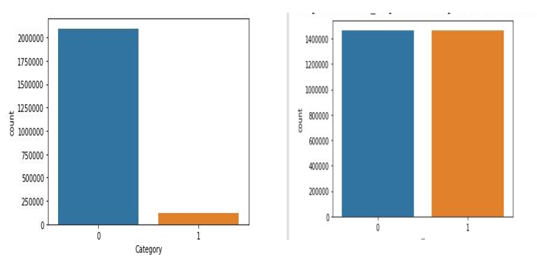

In [63]:
# Features and target variable
features = drugs_narcotics_data.drop(columns=['Drug_Category', 'Category', 'Date', 'Time'])
target = drugs_narcotics_data['Drug_Category']


In [64]:

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model Training and Prediction

In [65]:

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)



In [66]:
# Model Evaluation

def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{model_name} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print("\n")

# Evaluate the models
evaluate_model("Logistic Regression", y_test, logistic_pred)
evaluate_model("K-Nearest Neighbors", y_test, knn_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("XGBoost", y_test, xgb_pred)

Logistic Regression Accuracy: 0.9319
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     21961
           1       0.00      0.00      0.00      1604

    accuracy                           0.93     23565
   macro avg       0.47      0.50      0.48     23565
weighted avg       0.87      0.93      0.90     23565

Logistic Regression Confusion Matrix:
[[21961     0]
 [ 1604     0]]


K-Nearest Neighbors Accuracy: 0.9298
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     21961
           1       0.08      0.00      0.01      1604

    accuracy                           0.93     23565
   macro avg       0.51      0.50      0.48     23565
weighted avg       0.87      0.93      0.90     23565

K-Nearest Neighbors Confusion Matrix:
[[21905    56]
 [ 1599     5]]


Random Forest Accuracy: 0.9242
Random Forest

In [67]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


# Model Building and Evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}



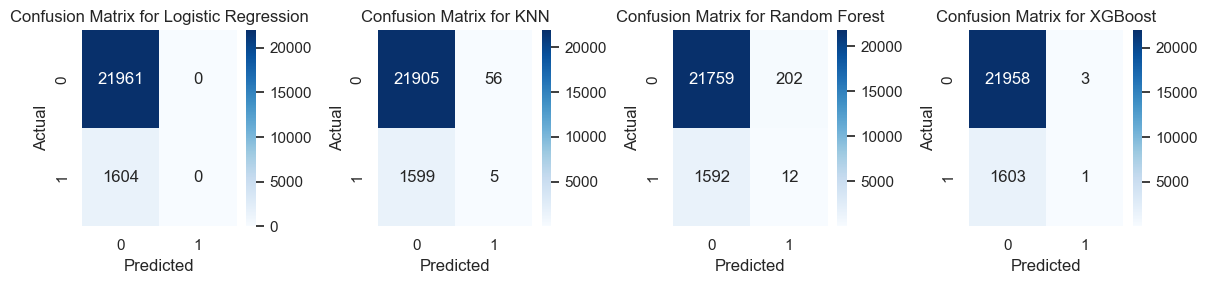

In [68]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Model Building and Confusion Matrix
plt.figure(figsize=(12, 3))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(1, len(models), i)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


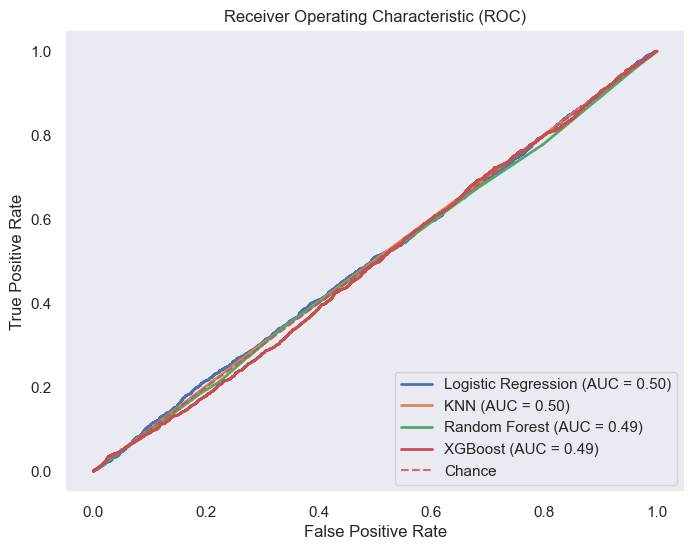

In [69]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Chance', alpha=0.8)

plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()
